# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [28]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

# 1. 나눔폰트 설치
!apt-get -qq install -y fonts-nanum

# 2. 런타임에 적용되도록 리셋
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 3. 설치된 나눔폰트 전체 리스트 불러오기
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

# 4. 폰트를 matplotlib에 등록
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 5. 사용할 폰트 이름 확인
font_name = fm.FontProperties(fname=font_files[0]).get_name()

# 6. 기본 폰트 설정
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import logging
import matplotlib.font_manager

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [31]:
# 데이터 불러오기
train=pd.read_csv("/content/movies_train.csv")
# test=pd.read_csv("/content/movies_test.csv")
# submission=pd.read_csv("/content/submission.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [32]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [33]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [34]:
print(train.shape)
# print(test.shape)
# print(submission.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [36]:
pd.options.display.float_format = '{:.1f}'.format

In [37]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [38]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [39]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [40]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
# test['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [41]:
train['release_time']=pd.to_datetime(train['release_time'])
# test['release_time']=pd.to_datetime(test['release_time'])

# **3. 가설과 그에 따른 EDA**

## 가설1:영화의 개봉시기는 관객 수에 영향을 미칠 것이다.
- 변수: 개봉일(release_time)와 관객 수(box_off_num)

In [42]:
!sudo apt-get install -y fonts-nanum
!fc-cache -fv


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [43]:
import logging
import matplotlib.font_manager

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

<Axes: xlabel='release_month', ylabel='count'>

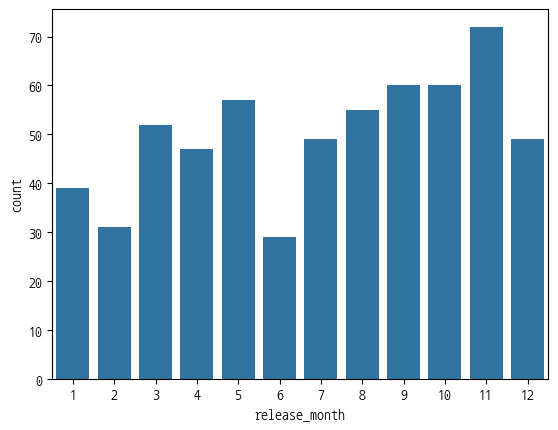

In [44]:
train['release_month']=train['release_time'].dt.month
sns.countplot(x=train['release_month'])

<Axes: xlabel='box_off_num', ylabel='Count'>

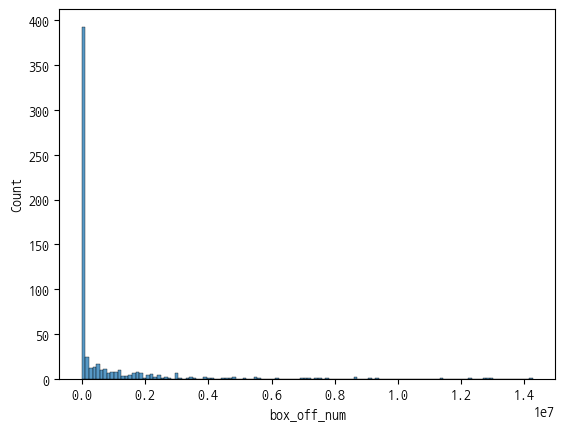

In [45]:
sns.histplot(train['box_off_num'])

<Axes: xlabel='log_box_off_num', ylabel='Count'>

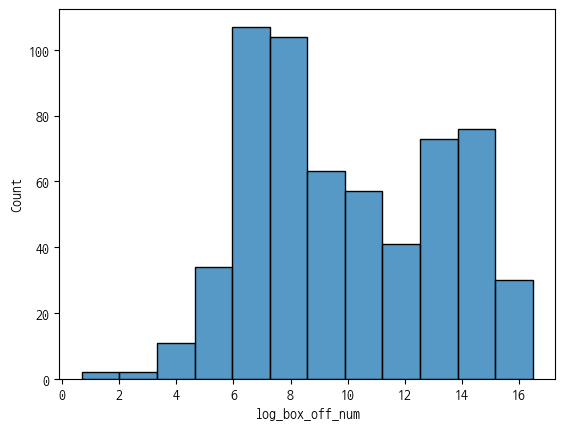

In [46]:
train['log_box_off_num'] = np.log1p(train['box_off_num'])
sns.histplot(train['log_box_off_num'])

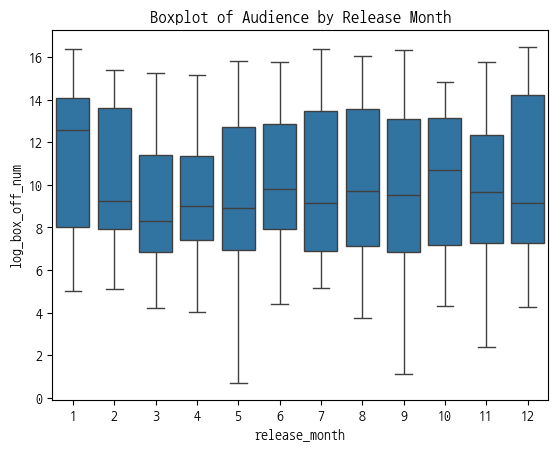

In [47]:
sns.boxplot(x='release_month', y='log_box_off_num', data=train)
plt.title("Boxplot of Audience by Release Month")
plt.show()



###그래프 해석
가장 관객수가 많은 달 1월은 사분위수도 높고, 중앙값도 높아 관객수가 가장 많은 달이다. 휴가철이기도 하고, 새해 영화가 큰 게 많이 나와서 그런듯.  
가장 관객수가 적은 달은 3월 정도.  
좀 의외였던 것은... 12월이 사분위 범위가 엄청 넓고 중앙값이 낮다는 것....   
관객 수가 적은 영화가 좀 많다

## 가설2. 배급사가 큰 배급사일수록 영화의 관객 수가 많을 것이다.

In [48]:
# 배급사별 평균 관객 수 계산
distributor_mean = train.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False)

# 큰 배급사 기준 설정 : 평균 관객 수 상위 10개 배급사
top_distributors = distributor_mean.head(10).index.tolist()

# 큰 배급사 여부를 나타내는 새로운 변수 생성(상위 10개 배급사에 포함되면 "Big" 아니면 "Others"로 새로운 열 생성)
train['is_big_distributor'] = train['distributor'].apply(lambda x : 'Big' if x in top_distributors else 'Others')

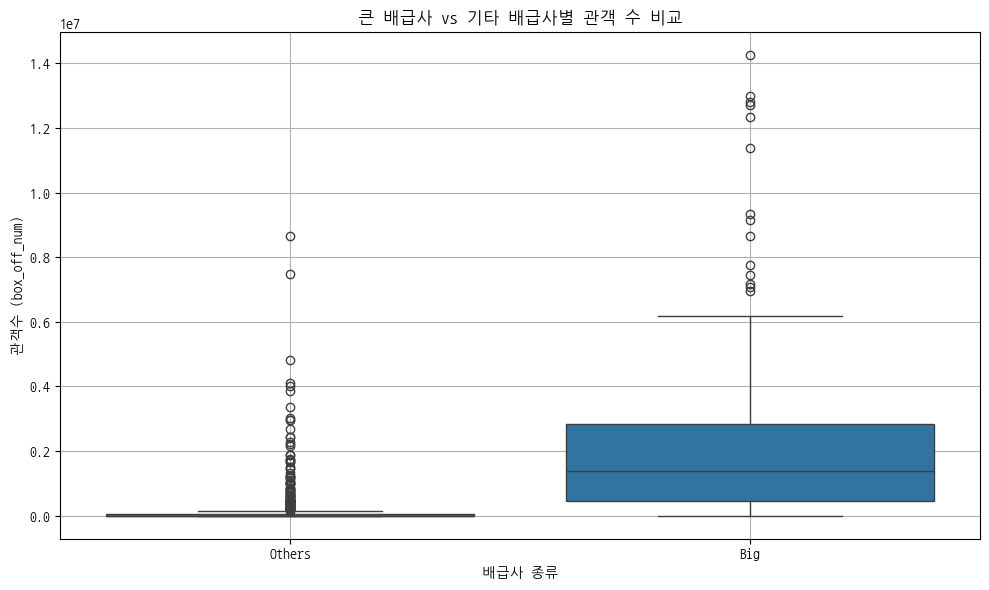

In [49]:
# 큰 배급사 vs 기타 배급사 시각화(박스프롯)

plt.figure(figsize=(10,6))
sns.boxplot(x='is_big_distributor', y='box_off_num', data=train)
plt.title('큰 배급사 vs 기타 배급사별 관객 수 비교')
plt.xlabel('배급사 종류')
plt.ylabel('관객수 (box_off_num)')
plt.grid(True) # 데이터 비교 가독성 향상(격자선 표시)
plt.tight_layout() # 텍스트 잘림 방지, 그래프 정돈(레이아웃 자동 정리)
plt.show()

### 그래프 해석
1. 중앙값(Median)
   - Big 박스의 중앙선이 Others 보다 훨씬 위에 있음
   - -> 큰 배급사의 영화들이 평균적으로 더 많은 관객을 모은다는 것을 의미
2. 박스(IQR)
   - Big은 박스가 더 길고 위쪽에 위치
   - -> 큰 배급사는 흥행한 영화들의 관객 수 분포가 넓고 전체적으로 높음
  
   - Others는 박스가 아랫부분에서 몰려 있고 낮음
   - -> 대부분의 영화가 적은 관객 수를 기록
3. 이상치(Outliers)
   - 두 그룹 모두 이상치 존재
   - 특히 Big 박스에서 많은 이상치 관측됨
   - -> 이는 대형 흥행작이 큰 배급사에서 많은 나왔다는 뜻
4. 전체 분포 비교
   - 전체적으로 Big 배급사 영화들의 관객 수가 많고 상위 흥행작 다수 존재
   - Others는 대체로 관객 수가 적고, 흥행작이 일부로 국한됨.
5. 가설 타당성
   - "큰 배급사가 다른 배급사보다 관객 수가 많을 것이다."라는 가설은 통계적으로 뒷받침됨.

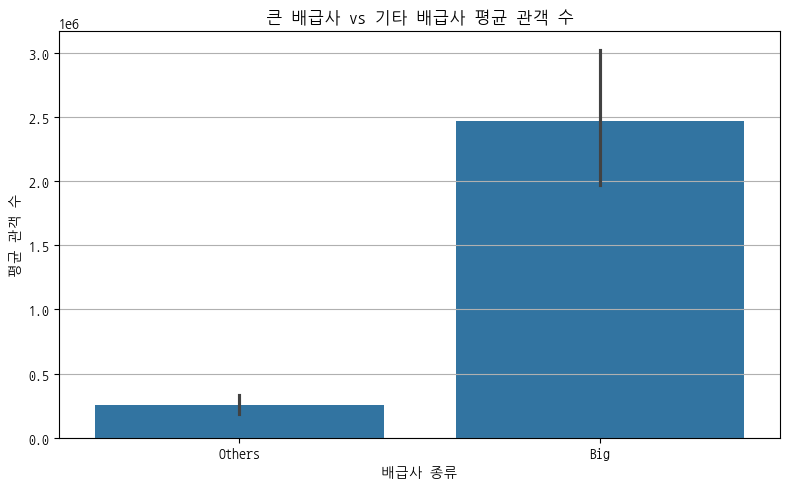

In [50]:
# 막대그래프
plt.figure(figsize=(8, 5))
sns.barplot(x='is_big_distributor', y='box_off_num', data=train)
plt.title('큰 배급사 vs 기타 배급사 평균 관객 수')
plt.xlabel('배급사 종류')
plt.ylabel('평균 관객 수')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 그래프 해석
1. Big 그룹이 Others 그룹보다 평균 관객 수 월등히 높음
   - Big : 약 240만 명
   - Others : 약 60만 명
   - 약 4배 차이
2. 막대 차이가 명확하고, 겹치는 부분 없음
   - 이는 통계적으로 유의미한 차이일 가능성이 높음

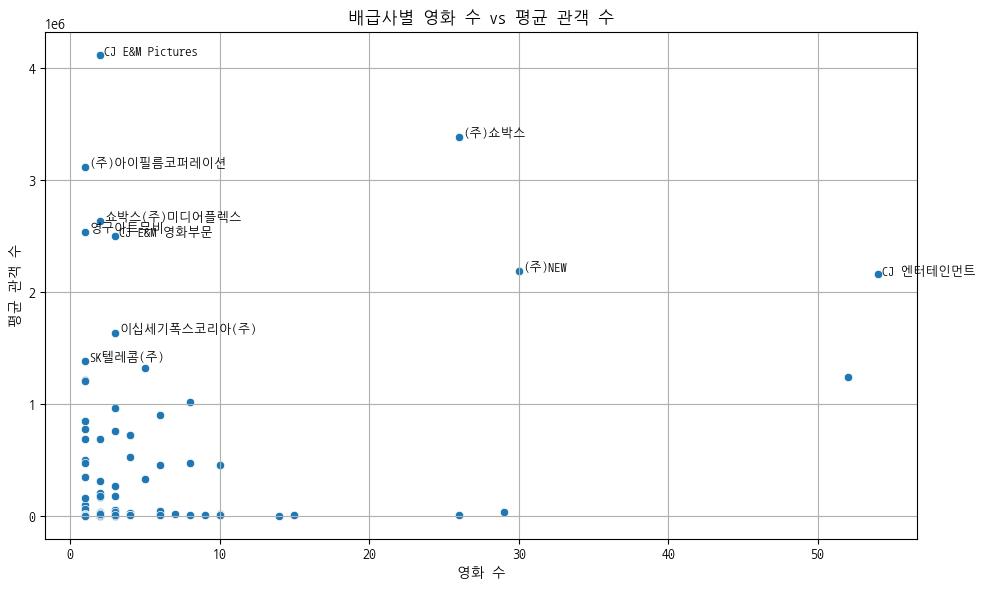

In [51]:
# 배급사별 영화 수 및 평균 관객 수 계산
stats = train.groupby('distributor')['box_off_num'].agg(['mean', 'count']).reset_index()
stats.columns = ['distributor', 'mean_box_off_num', 'movie_count']

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='movie_count', y='mean_box_off_num', data=stats)

# 상위 배급사 텍스트 표시
for _, row in stats.iterrows():
    if row['distributor'] in top_distributors:
        plt.text(row['movie_count']+0.3, row['mean_box_off_num'], row['distributor'], fontsize=9)

plt.title('배급사별 영화 수 vs 평균 관객 수')
plt.xlabel('영화 수')
plt.ylabel('평균 관객 수')
plt.grid(True)
plt.tight_layout()
plt.show()

### 그래프 해석
1. 오른쪽 아래 (영화 많지만 평균 낮음)
- CJ 엔터테인먼트
    - 영화 수 최다 (~50편 이상)
    - 하지만 평균 관객 수는 중간 이하 수준
    - 물량은 많지만 평균 흥행 성적은 평범

2.  왼쪽 위 (영화 적지만 평균 매우 높음)
- CJ E&M Pictures, 아이에이치큐, 미디어캐슬, 롯데쇼핑㈜롯데엔터
    - 영화 수는 적지만, 평균 관객 수가 300만~400만명 이상
    - 소수 정예, 흥행작만 배급한 경우로 볼 수 있음

3. 중간권 (적당한 영화 수 + 평균 관객 수)
- ㈜쇼박스, ㈜NEW, 씨제이씨지브이㈜ 등
    - 영화 수도 많고 평균 관객 수도 높은 편
    - 안정적으로 꾸준히 흥행한 배급사

4. 왼쪽 아래 (영화 수 적고 흥행도 낮음)
- 다수의 기타 소형 배급사들
    - 영화 수도 적고 평균 관객 수도 낮음
    - 시장 영향력 작음

### 결론
- 큰 배급사일일수록 영화 수가 많고, 평균 관객 수도 높은 경향이 있음.
- 단, 모든 큰 배급사가 평균 관객 수가 높지는 않음 -> 전략 차이 존재
    - ex) CJ엔터는 대량 배급
    - ex) CJ E&M은 적지만 고성능 작품

## 가설3: 상영등급이 '청소년 관람불가'라면, 영화의 관객 수가 적다.
- 변수: screening_rat (상영 등급)문자 , box_off_num (관객 수)숫자

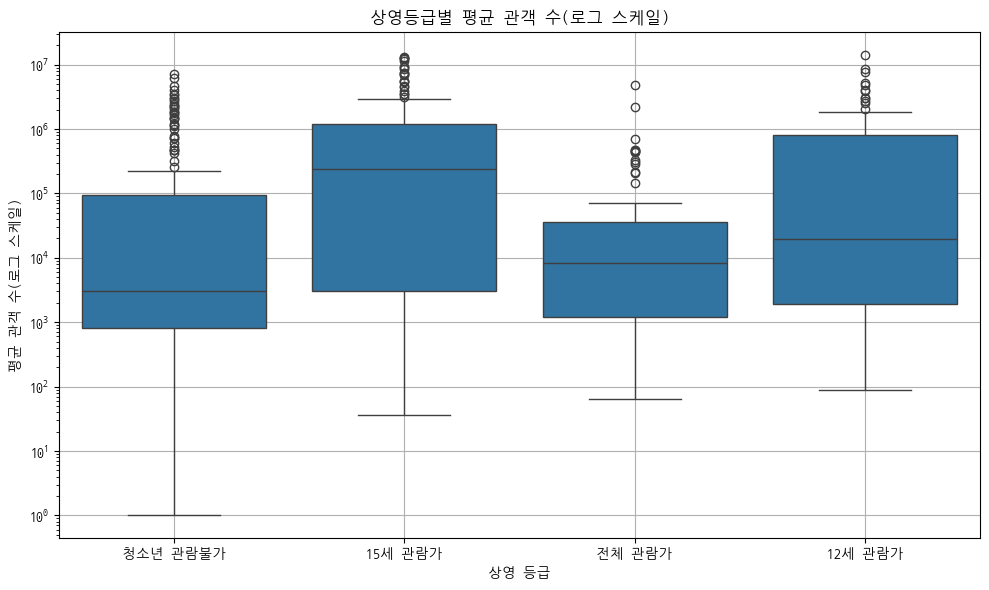

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='screening_rat', y='box_off_num', data=train)

plt.title('상영등급별 평균 관객 수(로그 스케일)')
plt.xlabel('상영 등급')
plt.ylabel('평균 관객 수(로그 스케일)')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

### 그래프 해석
'청소년 관람불가'영화의 평균 관객 수의 중앙값과 1사분위 수가 가장 낮았다. -> 평균 관객 수가 다른 등급의 영화에 비해 낮다

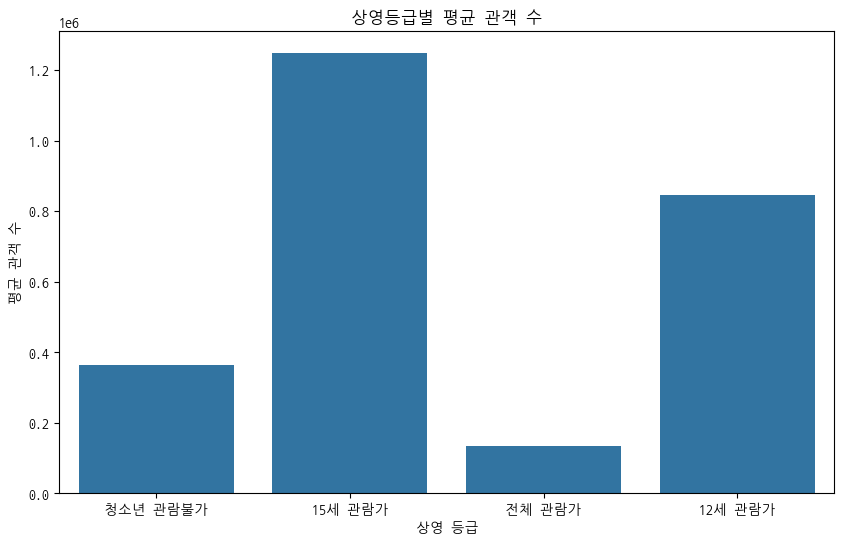

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='screening_rat', y='box_off_num',data=train,ci=None)

plt.title('상영등급별 평균 관객 수')
plt.xlabel('상영 등급')
plt.ylabel('평균 관객 수')

plt.show()

### 그래프 해석
전체 관람가->청소년 관람불가->12세 관람가->15세 관람가 순으로 평균 관객 수가 적다

###결론
'청소년 관람불가' 영화 수가 204개로 가장 많았던 것에 비해 평균 관객 수는 '전체 관람가' 다음으로 적었다. 또한 중앙값이 영화 등급 중 가장 낮았다. 이를 통해 상영 등급이 '청소년 관람 불가'면 관객 수가 적다고 볼 수 있다.

## 가설4. 영화의 제작에 참여한 스텝 수가 많을수록 관객 수가 증가할 것이다.

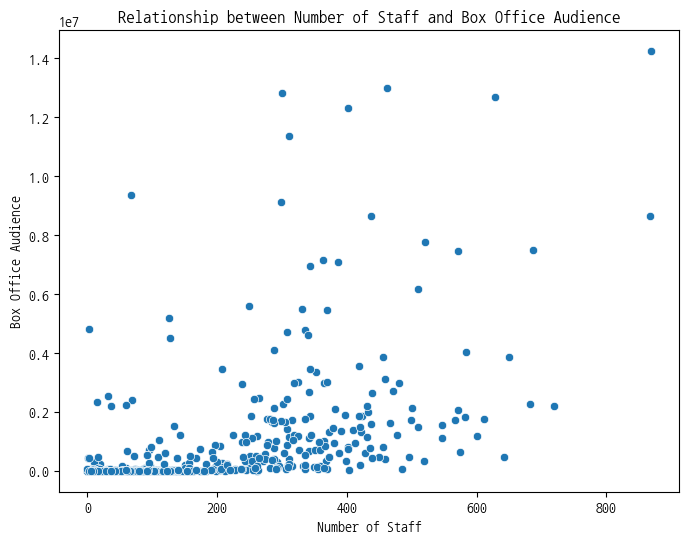

Correlation coefficient:
             num_staff  box_off_num
num_staff          1.0          0.5
box_off_num        0.5          1.0
                            OLS Regression Results                            
Dep. Variable:            box_off_num   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     251.7
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.44e-47
Time:                        05:34:49   Log-Likelihood:                -9396.7
No. Observations:                 600   AIC:                         1.880e+04
Df Residuals:                     598   BIC:                         1.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

In [54]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 산점도를 통해 관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['num_staff'], y=train['box_off_num'])
plt.xlabel('Number of Staff')
plt.ylabel('Box Office Audience')
plt.title('Relationship between Number of Staff and Box Office Audience')
plt.show()

# 상관계수 확인
correlation = train[['num_staff', 'box_off_num']].corr()
print("Correlation coefficient:")
print(correlation)

# 회귀 분석 (독립 변수: num_staff, 종속 변수: box_off_num)
X = train['num_staff']
y = train['box_off_num']
X = sm.add_constant(X)  # 상수항 추가 (절편 포함)
model = sm.OLS(y, X).fit()  # 선형 회귀 모델 적합

# 결과 출력
print(model.summary())


### 그래프 해석

- 스텝 수가 적을 때(0~200명), 관객 수가 매우 낮은 경우가 많음
- 스텝 수가 증가할수록 일부 영화의 관객 수가 높아지는 경향이 있음
- 완전한 선형 관계를 보이지는 않으며, 몇몇 영화가 극단적으로 높은 관객 수를 기록하고 있음

< R-squared >
- R-squared값 = 0.296
- 이는 num_staff가 box_off_num의 변동성을 29.6%만 설명한다는 의미
- 약 70% 이상의 변동성은 다른 요인들에 의해 결정됨
- 즉, num_actor, dir_prev_bfnum, genre, distributor 등의 변수가 관객 수에 더 큰 영향을 줄 가능성이 큼

< P-vlaue >
- num_staff의 P-value: 0.000
- 0.05보다 작기 때문에 스텝 수가 관객 수에 미치는 영향이 통계적으로 유의미하다는 것을 알 수 있음

< 회귀계수 >
- num_staff의 계수: 6005.98
- 스텝 수가 1명 증가할 때마다 평균적으로 관객 수가 6005.98명 증가함

<최종 결론>
- 스텝 수와 관객 수 사이에 양의 상관관계가 있고 통계적으로 유의미하지만 결정 계수가 낮은 것을 통해 영향력이 강하다고 보기는 어려움.
